In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [4]:
casualities = pd.read_csv('Casualties.csv')

In [5]:
crash = pd.read_csv('Crash.csv')

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
date = pd.read_csv('DateTime.csv')

In [7]:
description = pd.read_csv('Description.csv')

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3,6,7,8,9,10,11,12,13,14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
location = pd.read_csv('Location.csv')

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
vehicles = pd.read_csv('Vehicles.csv')

In [10]:
casualities.head()

,Unnamed: 0,casualties_id,casualties,fatalities,serious_injuries,minor_injuries
0,0,0c,0.0,0.0,0.0,0.0
1,16,1c1m,1.0,0.0,0.0,1.0
2,57,2c2m,2.0,0.0,0.0,2.0
3,270,1c1s,1.0,0.0,1.0,0.0
4,573,1c1f,1.0,1.0,0.0,0.0


In [11]:
date.head()

,Unnamed: 0,date_time_id,year,month,day_of_week,day_of_month,hour,approximate
0,0,2012-1--7-16,2012,1.0,7.0,NaN,16.0,True
1,1,2012-1--7-9,2012,1.0,7.0,NaN,9.0,True
2,2,2012-1--3-11,2012,1.0,3.0,NaN,11.0,True
3,3,2012-1--3-10,2012,1.0,3.0,NaN,10.0,True
4,4,2012-1--3-15,2012,1.0,3.0,NaN,15.0,True


In [12]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127505 entries, 0 to 127504
Data columns (total 8 columns):
Unnamed: 0      127505 non-null int64
date_time_id    127505 non-null object
year            127505 non-null int64
month           127486 non-null float64
day_of_week     127486 non-null float64
day_of_month    92802 non-null float64
hour            127486 non-null float64
approximate     127505 non-null bool
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 6.9+ MB


In [13]:
for i in vehicles.columns: 
    if vehicles[i].isnull().any():
     print('{0} has {1} null values'.format(i,vehicles[i].isnull().sum()))


vehicles_id has 2 null values
animals has 1 null values
car_sedan has 1 null values
car_utility has 1 null values
car_van has 1 null values
car_4x4 has 1 null values
car_station_wagon has 1 null values
motor_cycle has 1 null values
truck_small has 1 null values
truck_large has 1 null values
bus has 1 null values
taxi has 1 null values
bicycle has 1 null values
scooter has 1 null values
pedestrian has 1 null values
inanimate has 1 null values
train has 1 null values
tram has 1 null values
vehicle_other has 1 null values


In [14]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2434 entries, 0 to 2433
Data columns (total 20 columns):
Unnamed: 0           2434 non-null int64
vehicles_id          2432 non-null object
animals              2433 non-null float64
car_sedan            2433 non-null float64
car_utility          2433 non-null float64
car_van              2433 non-null float64
car_4x4              2433 non-null float64
car_station_wagon    2433 non-null float64
motor_cycle          2433 non-null float64
truck_small          2433 non-null float64
truck_large          2433 non-null float64
bus                  2433 non-null float64
taxi                 2433 non-null float64
bicycle              2433 non-null float64
scooter              2433 non-null float64
pedestrian           2433 non-null float64
inanimate            2433 non-null float64
train                2433 non-null float64
tram                 2433 non-null float64
vehicle_other        2433 non-null float64
dtypes: float64(18), int64(1), objec

In [15]:
#description
#location
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922134 entries, 0 to 922133
Data columns (total 9 columns):
Unnamed: 0               922134 non-null int64
lat_long                 922134 non-null object
latitude                 844695 non-null float64
longitude                918263 non-null float64
country                  922134 non-null object
state                    922134 non-null object
local_government_area    790287 non-null object
statistical_area         595623 non-null object
suburb                   332073 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 63.3+ MB


In [16]:
casualities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 6 columns):
Unnamed: 0          259 non-null int64
casualties_id       258 non-null object
casualties          258 non-null float64
fatalities          258 non-null float64
serious_injuries    258 non-null float64
minor_injuries      258 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 12.3+ KB


In [17]:
date.head()

,Unnamed: 0,date_time_id,year,month,day_of_week,day_of_month,hour,approximate
0,0,2012-1--7-16,2012,1.0,7.0,NaN,16.0,True
1,1,2012-1--7-9,2012,1.0,7.0,NaN,9.0,True
2,2,2012-1--3-11,2012,1.0,3.0,NaN,11.0,True
3,3,2012-1--3-10,2012,1.0,3.0,NaN,10.0,True
4,4,2012-1--3-15,2012,1.0,3.0,NaN,15.0,True


In [18]:
description.head()

,Unnamed: 0,description_id,severity,speed_limit,midblock,intersection,road_position_horizontal,road_position_vertical,road_sealed,road_wet,weather,crash_type,lighting,traffic_controls,drugs_alcohol,DCA_code,comment
0,0,0,property_damage,60,True,False,straight,level,True,False,fine,Right Angle,daylight,none,NaN,NaN,NaN
1,1,1,property_damage,40,True,False,straight,level,True,False,fine,Hit Parked Vehicle,daylight,none,NaN,NaN,NaN
2,2,2,property_damage,100,True,False,straight,slope,True,False,fine,Other,daylight,none,NaN,NaN,NaN
3,3,3,property_damage,60,False,True,straight,level,True,False,fine,Rear End,daylight,stop_sign,NaN,NaN,NaN
4,4,4,property_damage,60,False,True,straight,level,True,False,fine,Rear End,daylight,traffic_lights,NaN,NaN,NaN


In [19]:
location.head()

,Unnamed: 0,lat_long,latitude,longitude,country,state,local_government_area,statistical_area,suburb
0,0,"(-34.914968707994774, 138.62326191400015)",-34.914969,138.623262,AU,SA,"CC OF NORWOOD,PAYNEHAM & ST PETERS",NaN,STEPNEY
1,1,"(-34.945411892314496, 138.61069073873753)",-34.945412,138.610691,AU,SA,CITY OF UNLEY,NaN,PARKSIDE
2,2,"(-35.348782706688546, 138.4547384995269)",-35.348783,138.454738,AU,SA,CITY OF ONKAPARINGA,NaN,SELLICKS BEACH
3,3,"(-34.91089013663556, 138.56464045685533)",-34.910890,138.564640,AU,SA,CITY OF CHARLES STURT,NaN,HINDMARSH
4,4,"(-34.90523508247097, 138.57241145966046)",-34.905235,138.572411,AU,SA,CITY OF CHARLES STURT,NaN,HINDMARSH


In [20]:
vehicles.head()

,Unnamed: 0,vehicles_id,animals,car_sedan,car_utility,car_van,car_4x4,car_station_wagon,motor_cycle,truck_small,truck_large,bus,taxi,bicycle,scooter,pedestrian,inanimate,train,tram,vehicle_other
0,0,1c1b,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2c,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2c1i,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,2w,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1c1w,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
casualities.columns

Index(['Unnamed: 0', 'casualties_id', 'casualties', 'fatalities',
       'serious_injuries', 'minor_injuries'],
      dtype='object')

In [22]:
for i in casualities.columns: 
    if casualities[i].isnull().any():
     print('{0} has {1} null values'.format(i,casualities[i].isnull().sum()))


casualties_id has 1 null values
casualties has 1 null values
fatalities has 1 null values
serious_injuries has 1 null values
minor_injuries has 1 null values


In [23]:
crash.columns

Index(['Unnamed: 0', 'crash_id', 'lat_long', 'date_time_id', 'description_id',
       'vehicles_id', 'casualties_id'],
      dtype='object')

In [24]:
crash.head()

,Unnamed: 0,crash_id,lat_long,date_time_id,description_id,vehicles_id,casualties_id
0,0,SA2012-1-21/08/2019,"(-34.914968707994774, 138.62326191400015)",2012-1--7-16,0,1c1b,0c
1,1,SA2012-2-21/08/2019,"(-34.945411892314496, 138.61069073873753)",2012-1--7-9,1,2c,0c
2,2,SA2012-3-21/08/2019,"(-35.348782706688546, 138.4547384995269)",2012-1--3-11,2,2c1i,0c
3,3,SA2012-4-21/08/2019,"(-34.91089013663556, 138.56464045685533)",2012-1--3-10,3,2w,0c
4,4,SA2012-5-21/08/2019,"(-34.90523508247097, 138.57241145966046)",2012-1--3-15,4,1c1w,0c


In [25]:
for i in crash.columns: 
    if crash[i].isnull().any():
     print('{0} has {1} null values'.format(i,crash[i].isnull().sum()))


vehicles_id has 71400 null values
casualties_id has 212390 null values


In [26]:
date.columns

Index(['Unnamed: 0', 'date_time_id', 'year', 'month', 'day_of_week',
       'day_of_month', 'hour', 'approximate'],
      dtype='object')

In [27]:
for i in date.columns: 
    if date[i].isnull().any():
     print('{0} has {1} null values'.format(i,date[i].isnull().sum()))


month has 19 null values
day_of_week has 19 null values
day_of_month has 34703 null values
hour has 19 null values


In [28]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127505 entries, 0 to 127504
Data columns (total 8 columns):
Unnamed: 0      127505 non-null int64
date_time_id    127505 non-null object
year            127505 non-null int64
month           127486 non-null float64
day_of_week     127486 non-null float64
day_of_month    92802 non-null float64
hour            127486 non-null float64
approximate     127505 non-null bool
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 6.9+ MB


In [29]:
location.head()

,Unnamed: 0,lat_long,latitude,longitude,country,state,local_government_area,statistical_area,suburb
0,0,"(-34.914968707994774, 138.62326191400015)",-34.914969,138.623262,AU,SA,"CC OF NORWOOD,PAYNEHAM & ST PETERS",NaN,STEPNEY
1,1,"(-34.945411892314496, 138.61069073873753)",-34.945412,138.610691,AU,SA,CITY OF UNLEY,NaN,PARKSIDE
2,2,"(-35.348782706688546, 138.4547384995269)",-35.348783,138.454738,AU,SA,CITY OF ONKAPARINGA,NaN,SELLICKS BEACH
3,3,"(-34.91089013663556, 138.56464045685533)",-34.910890,138.564640,AU,SA,CITY OF CHARLES STURT,NaN,HINDMARSH
4,4,"(-34.90523508247097, 138.57241145966046)",-34.905235,138.572411,AU,SA,CITY OF CHARLES STURT,NaN,HINDMARSH


In [30]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922134 entries, 0 to 922133
Data columns (total 9 columns):
Unnamed: 0               922134 non-null int64
lat_long                 922134 non-null object
latitude                 844695 non-null float64
longitude                918263 non-null float64
country                  922134 non-null object
state                    922134 non-null object
local_government_area    790287 non-null object
statistical_area         595623 non-null object
suburb                   332073 non-null object
dtypes: float64(2), int64(1), object(6)
memory usage: 63.3+ MB


In [31]:
for i in location.columns: 
    if location[i].isnull().any():
     print('{0} has {1} null values'.format(i,location[i].isnull().sum()))


latitude has 77439 null values
longitude has 3871 null values
local_government_area has 131847 null values
statistical_area has 326511 null values
suburb has 590061 null values


In [32]:
for i in description.columns: 
    if description[i].isnull().any():
     print('{0} has {1} null values'.format(i,description[i].isnull().sum()))


speed_limit has 212404 null values
road_position_horizontal has 402179 null values
road_position_vertical has 402179 null values
road_sealed has 1015406 null values
road_wet has 1015618 null values
weather has 150937 null values
crash_type has 1181137 null values
lighting has 150937 null values
traffic_controls has 402179 null values
drugs_alcohol has 1515825 null values
DCA_code has 1329666 null values
comment has 1329666 null values


In [33]:
description = description.drop('comment',axis=1)

In [34]:
description = description.drop('DCA_code',axis=1)

In [35]:
description = description.drop('drugs_alcohol',axis=1)

In [36]:
description['traffic_controls'].unique()

array(['none', 'stop_sign', 'traffic_lights', 'giveway_sign',
       'railway_crossing', 'other', nan, 'manual_control',
       'school_crossing', 'pedestrian_crossing'], dtype=object)

In [37]:
description['traffic_controls'] = description['traffic_controls'].fillna('other')

In [38]:
description['weather'].unique()

array(['fine', 'unknown', 'rain', 'smoke_dust', 'high_wind', 'fog',
       'snow', 'mist', nan, 'overcast', 'other'], dtype=object)

In [39]:
description['weather'] = description['weather'].fillna('unknown')

In [40]:
description['road_position_vertical'].unique()

array(['level', 'slope', 'unknown', 'crest', 'dip', nan], dtype=object)

In [41]:
description['road_position_vertical'] = description['road_position_vertical'].fillna('unknown')

In [42]:
description['road_position_horizontal'].unique()

array(['straight', 'curved_view_open', 'unknown', 'curved_view_obscure',
       nan], dtype=object)

In [43]:
description['road_position_horizontal'] = description['road_position_horizontal'].fillna('unknown')

In [44]:
description['speed_limit'].unique()

array([60, 40, 100, 50, 80, 70, 90, 25, 110, 15, 10, 20, 30, 5, 75, 999,
       888, 777, nan, '100.0', '60.0', '50.0', '90.0', '80.0', '70.0',
       '30.0', '10.0', '20.0', '40.0', '110.0', '100 - 110 km/h',
       '60 km/h', '0 - 50 km/h', '70 km/h', '80 - 90 km/h'], dtype=object)

In [45]:
description['road_sealed'].unique() #road not sealed most of the time

array([True, nan, False], dtype=object)

In [46]:
description['road_sealed'] = description['road_sealed'].fillna('False')

In [47]:
description['road_wet'].unique()

array([False, nan, True], dtype=object)

In [48]:
description['road_wet'] = description['road_wet'].fillna('False')

In [49]:
description['road_position_horizontal'] = description['road_position_horizontal'].fillna('unknown')

In [50]:
description['lighting'].unique()

array(['daylight', 'darkness_not_lit', 'darkness_lit', 'dawn_dusk',
       'unknown', 'other', nan], dtype=object)

In [51]:
description['lighting'] = description['lighting'].fillna('unknown')

In [52]:
description['crash_type'].unique()

array(['Right Angle', 'Hit Parked Vehicle', 'Other', 'Rear End',
       'Side Swipe', 'Right Turn', 'Head On', 'Hit Pedestrian',
       'Hit Fixed Object', 'Roll Over', 'Left Road - Out of Control',
       'Hit Object on Road', 'Hit Animal', 'Collision with vehicle',
       'Fall from or in moving vehicle', 'Collision with a fixed object',
       'Struck Pedestrian', 'collision with some other object',
       'Vehicle overturned (no collision)',
       'No collision and no object struck', 'Struck animal',
       'Other accident', nan, 'Non Collision Involving Animal',
       'Hit Animal Involving Animal', 'Rear End Involving Parking',
       'Rear End Involving Overtaking', 'Right Angle Involving Parking',
       'Hit Pedestrian Involving Pedestrian',
       'Sideswipe Same Dirn Involving Overtaking',
       'Right Turn Thru Entering / Leaving Driveway',
       'Right Angle Entering / Leaving Driveway',
       'Hit Object Involving Animal',
       'Rear End Entering / Leaving Driveway'

In [53]:
description['crash_type'] = description['crash_type'].fillna('Other')

In [54]:
description = description.dropna()

In [55]:
description.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307051 entries, 0 to 1307064
Data columns (total 14 columns):
Unnamed: 0                  1307051 non-null int64
description_id              1307051 non-null int64
severity                    1307051 non-null object
speed_limit                 1307051 non-null object
midblock                    1307051 non-null bool
intersection                1307051 non-null bool
road_position_horizontal    1307051 non-null object
road_position_vertical      1307051 non-null object
road_sealed                 1307051 non-null object
road_wet                    1307051 non-null object
weather                     1307051 non-null object
crash_type                  1307051 non-null object
lighting                    1307051 non-null object
traffic_controls            1307051 non-null object
dtypes: bool(2), int64(2), object(10)
memory usage: 132.1+ MB


In [56]:
location.columns

Index(['Unnamed: 0', 'lat_long', 'latitude', 'longitude', 'country', 'state',
       'local_government_area', 'statistical_area', 'suburb'],
      dtype='object')

In [57]:
for i in location.columns: 
    if location[i].isnull().any():
     print('{0} has {1} null values'.format(i,location[i].isnull().sum()))


latitude has 77439 null values
longitude has 3871 null values
local_government_area has 131847 null values
statistical_area has 326511 null values
suburb has 590061 null values


In [58]:
vehicles.columns

Index(['Unnamed: 0', 'vehicles_id', 'animals', 'car_sedan', 'car_utility',
       'car_van', 'car_4x4', 'car_station_wagon', 'motor_cycle', 'truck_small',
       'truck_large', 'bus', 'taxi', 'bicycle', 'scooter', 'pedestrian',
       'inanimate', 'train', 'tram', 'vehicle_other'],
      dtype='object')

In [59]:
for i in vehicles.columns: 
    if vehicles[i].isnull().any():
     print('{0} has {1} null values'.format(i,vehicles[i].isnull().sum()))


vehicles_id has 2 null values
animals has 1 null values
car_sedan has 1 null values
car_utility has 1 null values
car_van has 1 null values
car_4x4 has 1 null values
car_station_wagon has 1 null values
motor_cycle has 1 null values
truck_small has 1 null values
truck_large has 1 null values
bus has 1 null values
taxi has 1 null values
bicycle has 1 null values
scooter has 1 null values
pedestrian has 1 null values
inanimate has 1 null values
train has 1 null values
tram has 1 null values
vehicle_other has 1 null values


In [60]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2434 entries, 0 to 2433
Data columns (total 20 columns):
Unnamed: 0           2434 non-null int64
vehicles_id          2432 non-null object
animals              2433 non-null float64
car_sedan            2433 non-null float64
car_utility          2433 non-null float64
car_van              2433 non-null float64
car_4x4              2433 non-null float64
car_station_wagon    2433 non-null float64
motor_cycle          2433 non-null float64
truck_small          2433 non-null float64
truck_large          2433 non-null float64
bus                  2433 non-null float64
taxi                 2433 non-null float64
bicycle              2433 non-null float64
scooter              2433 non-null float64
pedestrian           2433 non-null float64
inanimate            2433 non-null float64
train                2433 non-null float64
tram                 2433 non-null float64
vehicle_other        2433 non-null float64
dtypes: float64(18), int64(1), objec

In [61]:
casualities.columns

Index(['Unnamed: 0', 'casualties_id', 'casualties', 'fatalities',
       'serious_injuries', 'minor_injuries'],
      dtype='object')

In [62]:
crash.columns

Index(['Unnamed: 0', 'crash_id', 'lat_long', 'date_time_id', 'description_id',
       'vehicles_id', 'casualties_id'],
      dtype='object')

In [63]:
date.columns

Index(['Unnamed: 0', 'date_time_id', 'year', 'month', 'day_of_week',
       'day_of_month', 'hour', 'approximate'],
      dtype='object')

In [64]:
description.columns

Index(['Unnamed: 0', 'description_id', 'severity', 'speed_limit', 'midblock',
       'intersection', 'road_position_horizontal', 'road_position_vertical',
       'road_sealed', 'road_wet', 'weather', 'crash_type', 'lighting',
       'traffic_controls'],
      dtype='object')

In [65]:
location.columns

Index(['Unnamed: 0', 'lat_long', 'latitude', 'longitude', 'country', 'state',
       'local_government_area', 'statistical_area', 'suburb'],
      dtype='object')

In [66]:
vehicles.columns

Index(['Unnamed: 0', 'vehicles_id', 'animals', 'car_sedan', 'car_utility',
       'car_van', 'car_4x4', 'car_station_wagon', 'motor_cycle', 'truck_small',
       'truck_large', 'bus', 'taxi', 'bicycle', 'scooter', 'pedestrian',
       'inanimate', 'train', 'tram', 'vehicle_other'],
      dtype='object')

In [67]:
location = location.drop('statistical_area',axis=1)

In [68]:
location = location.drop('suburb',axis=1)

In [69]:
location = location.drop('lat_long',axis=1)

In [70]:
location = location.drop('local_government_area',axis=1)

In [71]:
location=location.dropna()

In [72]:
description.tail()

,Unnamed: 0,description_id,severity,speed_limit,midblock,intersection,road_position_horizontal,road_position_vertical,road_sealed,road_wet,weather,crash_type,lighting,traffic_controls
1307060,1307060,1307060,property_damage,60 km/h,True,False,straight,level,True,True,rain,Other,daylight,none
1307061,1307061,1307061,serious_injury,60 km/h,True,False,straight,level,True,False,fine,Other,daylight,none
1307062,1307062,1307062,serious_injury,100 - 110 km/h,True,False,straight,crest,True,False,fine,Other,daylight,none
1307063,1307063,1307063,minor_injury,100 - 110 km/h,True,False,curved_view_open,slope,True,False,fine,Other,daylight,none
1307064,1307064,1307064,serious_injury,60 km/h,False,True,straight,dip,True,False,fine,Other,daylight,none


In [73]:
location.tail()

,Unnamed: 0,latitude,longitude,country,state
922129,1519450,-35.322395,149.122591,AU,ACT
922130,1519451,-35.257719,149.090351,AU,ACT
922131,1519452,-35.186379,149.119175,AU,ACT
922132,1519453,-35.352057,149.085208,AU,ACT
922133,1519454,-35.263290,149.140344,AU,ACT


In [74]:
description['C'] = np.arange(len(description))

In [75]:
location['C'] = np.arange(len(location))

In [76]:
merged_left = pd.merge(left=description, right=location, how='inner', left_on='C', right_on='C')

In [77]:
merged_left.head()

,Unnamed: 0_x,description_id,severity,speed_limit,midblock,intersection,road_position_horizontal,road_position_vertical,road_sealed,road_wet,weather,crash_type,lighting,traffic_controls,C,Unnamed: 0_y,latitude,longitude,country,state
0,0,0,property_damage,60,True,False,straight,level,True,False,fine,Right Angle,daylight,none,0,0,-34.914969,138.623262,AU,SA
1,1,1,property_damage,40,True,False,straight,level,True,False,fine,Hit Parked Vehicle,daylight,none,1,1,-34.945412,138.610691,AU,SA
2,2,2,property_damage,100,True,False,straight,slope,True,False,fine,Other,daylight,none,2,2,-35.348783,138.454738,AU,SA
3,3,3,property_damage,60,False,True,straight,level,True,False,fine,Rear End,daylight,stop_sign,3,3,-34.910890,138.564640,AU,SA
4,4,4,property_damage,60,False,True,straight,level,True,False,fine,Rear End,daylight,traffic_lights,4,4,-34.905235,138.572411,AU,SA


In [78]:
for i in merged_left.columns: 
    if merged_left[i].isnull().any():
     print('{0} has {1} null values'.format(i,merged_left[i].isnull().sum()))


In [79]:
merged_left = merged_left.drop('C',axis=1)

In [80]:
merged_left = merged_left.drop(['Unnamed: 0_x','description_id','Unnamed: 0_y'],axis=1)


In [81]:
merged_left.head()

,severity,speed_limit,midblock,intersection,road_position_horizontal,road_position_vertical,road_sealed,road_wet,weather,crash_type,lighting,traffic_controls,latitude,longitude,country,state
0,property_damage,60,True,False,straight,level,True,False,fine,Right Angle,daylight,none,-34.914969,138.623262,AU,SA
1,property_damage,40,True,False,straight,level,True,False,fine,Hit Parked Vehicle,daylight,none,-34.945412,138.610691,AU,SA
2,property_damage,100,True,False,straight,slope,True,False,fine,Other,daylight,none,-35.348783,138.454738,AU,SA
3,property_damage,60,False,True,straight,level,True,False,fine,Rear End,daylight,stop_sign,-34.910890,138.564640,AU,SA
4,property_damage,60,False,True,straight,level,True,False,fine,Rear End,daylight,traffic_lights,-34.905235,138.572411,AU,SA


In [82]:
label = merged_left.drop(['speed_limit'],axis=1)

               


In [83]:
label.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 844695 entries, 0 to 844694
Data columns (total 15 columns):
severity                    844695 non-null object
midblock                    844695 non-null bool
intersection                844695 non-null bool
road_position_horizontal    844695 non-null object
road_position_vertical      844695 non-null object
road_sealed                 844695 non-null object
road_wet                    844695 non-null object
weather                     844695 non-null object
crash_type                  844695 non-null object
lighting                    844695 non-null object
traffic_controls            844695 non-null object
latitude                    844695 non-null float64
longitude                   844695 non-null float64
country                     844695 non-null object
state                       844695 non-null object
dtypes: bool(2), float64(2), object(11)
memory usage: 91.8+ MB


In [84]:
label['midblock'] = label['midblock'].astype('str')

In [85]:
label['intersection'] = label['intersection'].astype('str')

In [86]:
label['road_sealed'] = label['road_sealed'].astype('str')

In [87]:
label['road_wet'] = label['road_wet'].astype('str')

In [88]:
label['latitude']=label['latitude'].astype('str')

In [89]:
label['longitude']=label['longitude'].astype('str')

In [90]:
label = label.apply(LabelEncoder().fit_transform)

In [91]:
merged_left.head()

,severity,speed_limit,midblock,intersection,road_position_horizontal,road_position_vertical,road_sealed,road_wet,weather,crash_type,lighting,traffic_controls,latitude,longitude,country,state
0,property_damage,60,True,False,straight,level,True,False,fine,Right Angle,daylight,none,-34.914969,138.623262,AU,SA
1,property_damage,40,True,False,straight,level,True,False,fine,Hit Parked Vehicle,daylight,none,-34.945412,138.610691,AU,SA
2,property_damage,100,True,False,straight,slope,True,False,fine,Other,daylight,none,-35.348783,138.454738,AU,SA
3,property_damage,60,False,True,straight,level,True,False,fine,Rear End,daylight,stop_sign,-34.910890,138.564640,AU,SA
4,property_damage,60,False,True,straight,level,True,False,fine,Rear End,daylight,traffic_lights,-34.905235,138.572411,AU,SA


In [92]:
label.head()

,severity,midblock,intersection,road_position_horizontal,road_position_vertical,road_sealed,road_wet,weather,crash_type,lighting,traffic_controls,latitude,longitude,country,state
0,2,1,0,2,2,1,0,0,14,3,2,240426,39386,0,3
1,2,1,0,2,2,1,0,0,7,3,2,247986,35663,0,3
2,2,1,0,2,3,1,0,0,11,3,2,318777,5661,0,3
3,2,0,1,2,2,1,0,0,13,3,6,239448,21682,0,3
4,2,0,1,2,2,1,0,0,13,3,7,238041,23741,0,3


In [93]:
x = merged_left[['speed_limit']]

In [94]:
x['C'] = np.arange(len(x))

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [95]:
label['C'] = np.arange(len(label))

In [96]:
label = pd.merge(left=label, right=x, how='inner', left_on='C', right_on='C')

In [97]:
label.head()

,severity,midblock,intersection,road_position_horizontal,road_position_vertical,road_sealed,road_wet,weather,crash_type,lighting,traffic_controls,latitude,longitude,country,state,C,speed_limit
0,2,1,0,2,2,1,0,0,14,3,2,240426,39386,0,3,0,60
1,2,1,0,2,2,1,0,0,7,3,2,247986,35663,0,3,1,40
2,2,1,0,2,3,1,0,0,11,3,2,318777,5661,0,3,2,100
3,2,0,1,2,2,1,0,0,13,3,6,239448,21682,0,3,3,60
4,2,0,1,2,2,1,0,0,13,3,7,238041,23741,0,3,4,60


In [98]:
label = label.drop(['C'],axis=1)

In [99]:
y = pd.DataFrame(label['severity'])

In [100]:
label = label.drop(['severity'],axis=1)


In [101]:
label = label.astype('int64')

In [102]:
X_split= preprocessing.StandardScaler().fit(label).transform(label)
X_split.shape

(844695, 15)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_split, y, test_size=0.3, random_state=1)

In [104]:
from sklearn.feature_selection import mutual_info_classif

In [105]:
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs


In [106]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature 0: 0.000000
Feature 1: 0.000000
Feature 2: 1.000000
Feature 3: 1.000000
Feature 4: 0.000000
Feature 5: 0.000000
Feature 6: 0.000000
Feature 7: 1.000000
Feature 8: 1.000000
Feature 9: 1.000000
Feature 10: 0.000000
Feature 11: 1.000000
Feature 12: 0.000000
Feature 13: 1.000000
Feature 14: 1.000000


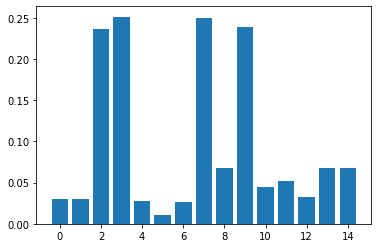

In [107]:
from matplotlib import pyplot
 
for i in range(len(fs.scores_)):
 #ram = fs.scores_[i]>0.5
 print('Feature %d: %f' % (i, fs.scores_[i]>0.05))

  #plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()
pyplot.rcParams["figure.figsize"] = (20,20)

In [108]:
label.head()

,midblock,intersection,road_position_horizontal,road_position_vertical,road_sealed,road_wet,weather,crash_type,lighting,traffic_controls,latitude,longitude,country,state,speed_limit
0,1,0,2,2,1,0,0,14,3,2,240426,39386,0,3,60
1,1,0,2,2,1,0,0,7,3,2,247986,35663,0,3,40
2,1,0,2,3,1,0,0,11,3,2,318777,5661,0,3,100
3,0,1,2,2,1,0,0,13,3,6,239448,21682,0,3,60
4,0,1,2,2,1,0,0,13,3,7,238041,23741,0,3,60


In [109]:
label.columns #2 3 7 8 9 11 13 14 

Index(['midblock', 'intersection', 'road_position_horizontal',
       'road_position_vertical', 'road_sealed', 'road_wet', 'weather',
       'crash_type', 'lighting', 'traffic_controls', 'latitude', 'longitude',
       'country', 'state', 'speed_limit'],
      dtype='object')

In [110]:
feature = label[['road_position_horizontal','road_position_vertical','crash_type','lighting','traffic_controls',
                 'state','speed_limit']]

In [111]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(feature, y, test_size=0.3, random_state=1)

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_s, y_train_s)
# evaluate the model
yhat = model.predict(X_test_s)
# evaluate predictions
accuracy = accuracy_score(y_test_s, yhat)
print('Accuracy: %.2f' % (accuracy*100))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sk

Accuracy: 68.14


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [113]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics 
import itertools

In [114]:
cnf_matrix = confusion_matrix(y_test_s, yhat)
cnf_matrix

array([[     0,   1182,   1750,      0],
       [     0,  37476,  45202,      0],
       [     0,   2708, 135208,      0],
       [     0,  20025,   9858,      0]])

In [115]:
print (classification_report(y_test_s, yhat))
print("Logistic Regression %2f" % metrics.accuracy_score(y_test_s,yhat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2932
           1       0.61      0.45      0.52     82678
           2       0.70      0.98      0.82    137916
           3       0.00      0.00      0.00     29883

    accuracy                           0.68    253409
   macro avg       0.33      0.36      0.33    253409
weighted avg       0.58      0.68      0.62    253409

Logistic Regression 0.681444


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [116]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier(criterion="entropy",max_depth=4)
dec

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [117]:
dec.fit(X_train_s,y_train_s)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [118]:
pred_tree = dec.predict(X_test_s)

In [119]:
from sklearn import metrics 
print("Decision Tree Classifier accuracy %2f" % metrics.accuracy_score(y_test_s,pred_tree))

Decision Tree Classifier accuracy 0.687770


In [ ]:
from sklearn import svm 
clf = svm.SVC(kernel='rbf')
clf.fit(X_train_s,y_train_s)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
y_hat = clf.predict(X_test_s)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics 
import itertools
cnf_matrix = confusion_matrix(y_test_s, y_hat)
cnf_matrix
print (classification_report(y_test, y_hat))
print("Support Vector Machine accuracy %2f" % metrics.accuracy_score(y_test_s,y_hat))

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
k=1
n=KNeighborsClassifier(n_neighbors=k).fit(X_train_s,y_train_s)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [122]:
y_dash=n.predict(X_test_s)
y_dash[0:5]

array([2, 3, 2, 2, 1])

In [123]:
k=10
mean_acc = np.zeros((k-1))
std_acc= np.zeros((k-1))
for n in range (1,k):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train_s,y_train_s)
    y_dash=neigh.predict(X_test_s)
    mean_acc[n-1]= metrics.accuracy_score(y_test_s,y_dash)
    
print( "The best accuracy was with KNN neighbor", mean_acc.max(), "with k=", mean_acc.argmax()+1)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/Applications/anaconda3/lib/python3.7/site-p

The best accuracy was with KNN neighbor 0.6680110019770411 with k= 9


In [124]:
k=9
n=KNeighborsClassifier(n_neighbors=k).fit(X_train_s,y_train_s)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [125]:
y_dash=n.predict(X_test_s)

In [126]:
y_dash[0:5]

array([2, 1, 2, 2, 2])